<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #337ab7; margin: 0;">
    <p style="margin: 0; color: #337ab7;"><strong>Fine-tune a pre-Trained model </strong></p>
</blockquote>

we use DenseNet and ResNet

In [25]:
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense, Dropout
from keras.models import Model
from tensorflow.keras import optimizers
from keras.applications import DenseNet121
from keras.applications import ResNet50

<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #black; margin: 0;">
    <p style="margin: 0; color: black;"><strong>DenseNet </strong></p>
</blockquote>

In [26]:
def fine_tune_densenet121():
    base_model = DenseNet121(weights='imagenet', include_top=False)
    
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    for layer in base_model.layers:
        layer.trainable = False

    return model
num_classes = 10 
model = fine_tune_densenet121()


In [27]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [30]:
model.compile(optimizer= optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 146s 212ms/step - loss: 1.0301 - accuracy: 0.6352 - val_loss: 1.0414 - val_accuracy: 0.6380
Epoch 2/20
625/625 [==============================] - 130s 209ms/step - loss: 0.9818 - accuracy: 0.6510 - val_loss: 1.0156 - val_accuracy: 0.6482
Epoch 3/20
625/625 [==============================] - 157s 252ms/step - loss: 0.9487 - accuracy: 0.6629 - val_loss: 1.0221 - val_accuracy: 0.6404
Epoch 4/20
625/625 [==============================] - 174s 278ms/step - loss: 0.9166 - accuracy: 0.6747 - val_loss: 1.0043 - val_accuracy: 0.6495
Epoch 5/20
625/625 [==============================] - 160s 256ms/step - loss: 0.8790 - accuracy: 0.6875 - val_loss: 1.0027 - val_accuracy: 0.6519
Epoch 6/20
625/625 [==============================] - 171s 274ms/step - loss: 0.8445 - accuracy: 0.6991 - val_loss: 1.0023 - val_accuracy: 0.6567
Epoch 7/20
625/625 [==============================] - 162s 259ms/step - loss: 0.8192 - accuracy: 0.7061 - val_loss: 1.0166 -

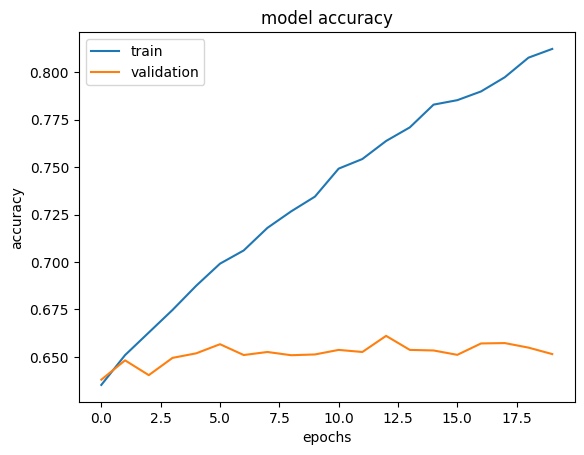

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
     

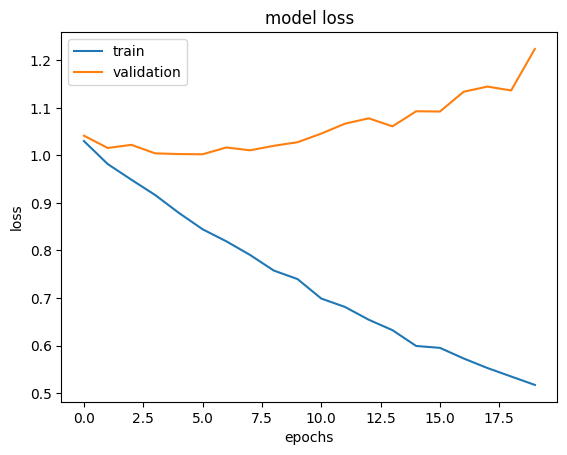

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [34]:

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")
     

313/313 [==============================] - 33s 104ms/step - loss: 1.2142 - accuracy: 0.6566
Test accuracy: 0.6565999984741211


<blockquote style="background-color: #f8f8f8; padding: 10px; border-left: 5px solid #black; margin: 0;">
    <p style="margin: 0; color: black;"><strong>ResNet </strong></p>
</blockquote>

In [36]:
def fine_tune_resnet50():
    # Load the ResNet-50 model pre-trained on ImageNet, excluding the top classification layer
    base_model = ResNet50(weights='imagenet', include_top=False)

    # Add custom layers for CIFAR-10 classification
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Create a new model by combining the base model and custom layers
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze the layers in the base model and train only the custom layers
    for layer in base_model.layers:
        layer.trainable = False

    return model
    
num_classes = 10 
model = fine_tune_densenet121()


In [37]:
model.compile(optimizer= optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 146s 204ms/step - loss: 1.3757 - accuracy: 0.5222 - val_loss: 1.1248 - val_accuracy: 0.6041
Epoch 2/20
625/625 [==============================] - 125s 200ms/step - loss: 1.1530 - accuracy: 0.5943 - val_loss: 1.0991 - val_accuracy: 0.6136
Epoch 3/20
625/625 [==============================] - 182s 291ms/step - loss: 1.0868 - accuracy: 0.6169 - val_loss: 1.0657 - val_accuracy: 0.6282
Epoch 4/20
625/625 [==============================] - 178s 285ms/step - loss: 1.0381 - accuracy: 0.6324 - val_loss: 1.0257 - val_accuracy: 0.6379
Epoch 5/20
625/625 [==============================] - 182s 291ms/step - loss: 0.9961 - accuracy: 0.6464 - val_loss: 1.0289 - val_accuracy: 0.6322
Epoch 6/20
625/625 [==============================] - 186s 298ms/step - loss: 0.9639 - accuracy: 0.6563 - val_loss: 1.0219 - val_accuracy: 0.6393
Epoch 7/20
625/625 [==============================] - 176s 282ms/step - loss: 0.9262 - accuracy: 0.6704 - val_loss: 1.0194 -

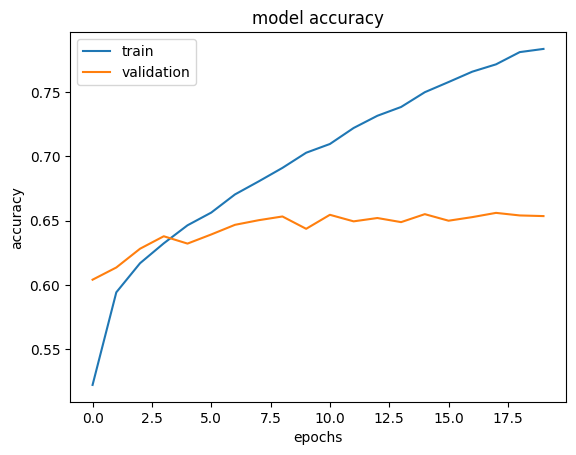

In [38]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
     

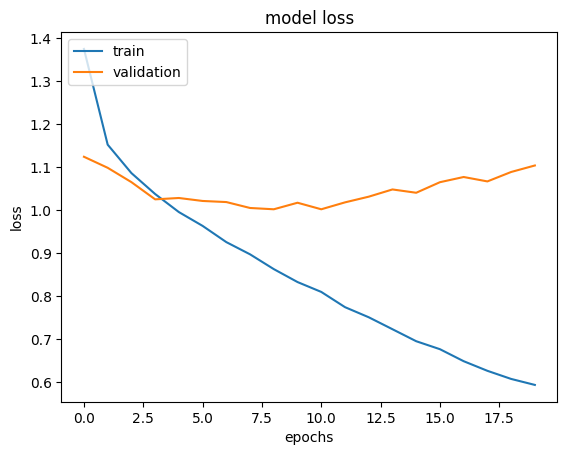

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [40]:

test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy}")
     

313/313 [==============================] - 35s 113ms/step - loss: 1.1164 - accuracy: 0.6549
Test accuracy: 0.6549000144004822
